In [ ]:
import numpy as np
import matplotlib.pyplot as plt
res = np.load('/home/user/data2/ICML_rebuttal/savings/uncond/etth2_24_S/KoVAEorig/cond_None_dtm_True_syn.npy')
# res = np.load('/home/user/data/ICML_rebuttal/savings/uncond/etth2_24_S/KoVAE_orig/cond_None_dtm_True_syn.npy')
start = np.random.randint(0, len(res))
_ = plt.plot(res[start, :, :].squeeze().T)

/home/user/anaconda3/envs/testgents/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA extension for cauchy multiplication not found. Install by going to extensions/cauchy/ and running `python setup.py install`. This should speed up end-to-end training by 10-50%
Falling back on slow Cauchy kernel. Install at least one of pykeops or the CUDA extension for efficiency.
Falling back on slow Vandermonde kernel. Install pykeops for improved memory efficiency.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type       | Params | Mode 
--------------------------------------------------------
0 | bijectors        | ModuleList | 118 K  | train
1 | FourierTransform | DFT        | 0      | train
--------------------------

Epoch 9: 100%|██████████| 22/22 [00:00<00:00, 51.29it/s, v_num=44, train_loss_step=-94.7, val_loss=-94.5, train_loss_epoch=-94.0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 22/22 [00:00<00:00, 48.56it/s, v_num=44, train_loss_step=-94.7, val_loss=-94.5, train_loss_epoch=-94.0]


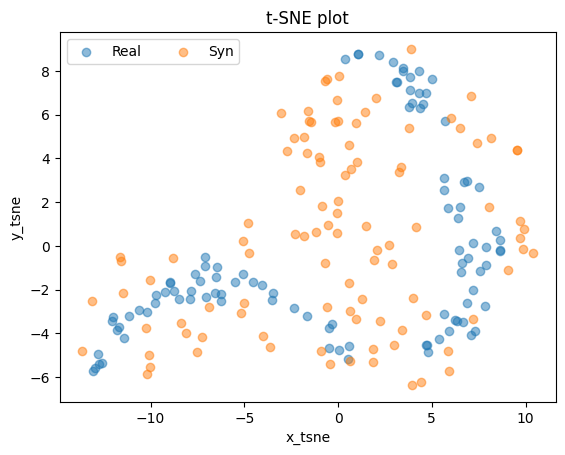

In [1]:
import torch
from gents.model import VanillaGAN, TimeGAN, VanillaMAF, VanillaVAE
from gents.dataset import SineND
from gents.evaluation import tsne_visual
from lightning import Trainer
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from gents.model.flow.fourierflow.model import FourierFlow


# setup dataset and model
dm = SineND(seq_len=24, seq_dim=1, batch_size=32)
model = FourierFlow(seq_len=dm.seq_len, seq_dim=dm.seq_dim)

# training (on CPU for example)
trainer = Trainer(
    max_epochs=10,
    accelerator="cpu",
    # callbacks=[EarlyStopping(monitor="val_loss", patience=20, mode="min")],
)
trainer.fit(model, dm)

model = FourierFlow.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
# # testing
dm.setup('test')
real_data = torch.cat([batch["seq"] for batch in dm.test_dataloader()])  # [N, 64, 2]
gen_data = model.sample(n_sample=len(real_data))  # [N, 64, 2]

# visualization with tsne
tsne_visual(real_data, gen_data, save_root="tsne.png")

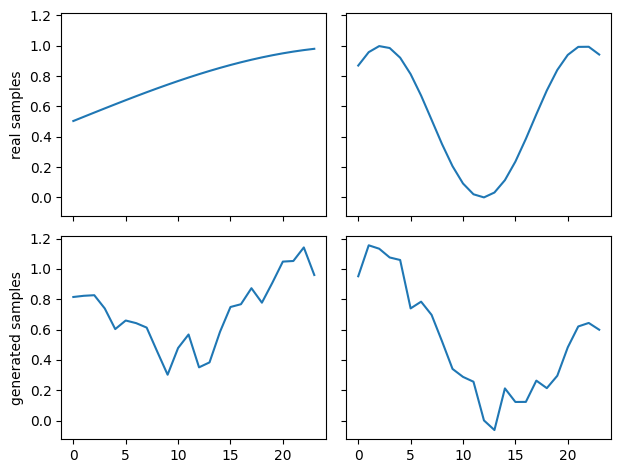

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axs = axs.flatten()
axs[0].plot(real_data[10])
axs[1].plot(real_data[20])
axs[0].set_ylabel('real samples')
# axs[1].set_title('real sample')

axs[2].plot(gen_data[20])
axs[3].plot(gen_data[5])
axs[2].set_ylabel('generated samples')
# axs[3].set_title('generated sample')

fig.tight_layout()
fig.savefig('samples.png')

In [ ]:
gen_data

In [ ]:
import numpy as np

real = np.array(
    [
        [1.00, 0.85, 0.71, 0.62, 0.53, 0.46],
        [0.85, 1.00, 0.84, 0.72, 0.62, 0.54],
        [0.71, 0.84, 1.00, 0.85, 0.73, 0.65],
        [0.62, 0.72, 0.85, 1.00, 0.85, 0.75],
        [0.53, 0.62, 0.73, 0.85, 1.00, 0.87],
        [0.46, 0.54, 0.65, 0.76, 0.87, 1.00],
    ]
)

pred = np.array(
    [
        [1.00, 0.842857, 0.702021, 0.62716, 0.562431, 0.483128],
        [0.842857, 1.00, 0.837755, 0.737079, 0.656868, 0.554467],
        [0.702021, 0.837755, 1.00, 0.867672, 0.753333, 0.662578],
        [0.62716, 0.737079, 0.867672, 1.00, 0.865952, 0.763136],
        [0.562431, 0.656868, 0.753333, 0.865952, 1.00, 0.868702],
        [0.483128, 0.554467, 0.662578, 0.763136, 0.868702, 1.00],
    ]
)

np.triu(np.abs(real - pred)/real).sum()/15

In [ ]:
import torch

(data, class_cond, cond) = torch.load('/home/user/data2/GenTS_exp/data/AirQuality/data_tsl24_tsd1_ir0.0.pt')

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type | Params | Mode 
------------------------------------------
0 | backbone | DiT  | 978 K  | train
------------------------------------------
977 K     Trainable params
1.0 K     Non-trainable params
978 K     Total params
3.913     Total estimated model params size (MB)
76        Modules in train mode
0         Modules in eval mode


Epoch 2: 100%|██████████| 22/22 [00:00<00:00, 54.78it/s, v_num=51, train_loss_step=0.0794, val_loss=0.0768, train_loss_epoch=0.0765]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 22/22 [00:00<00:00, 49.60it/s, v_num=51, train_loss_step=0.0794, val_loss=0.0768, train_loss_epoch=0.0765]
torch.Size([100, 64, 2])
torch.Size([100, 64, 2])


0.35498934999108317

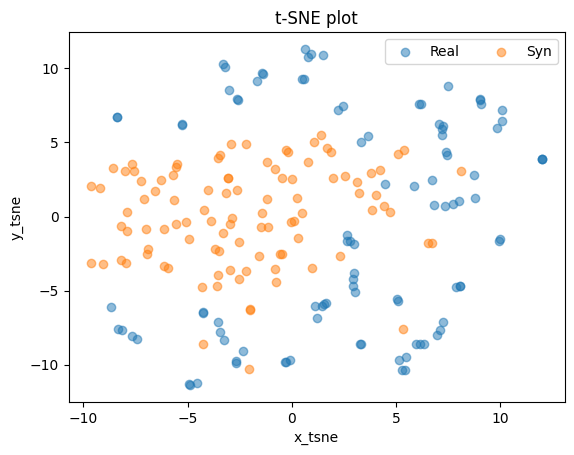

In [ ]:
import torch
from gents.model import VanillaDDPM
from gents.dataset import SineND
from gents.evaluation import tsne_visual, predictive_score
from lightning import Trainer

# setup dataset and model
dm = SineND(seq_len=64, seq_dim=2)
model = VanillaDDPM(seq_len=dm.seq_len, 
                    seq_dim=dm.seq_dim, 
                    condition=None)

# training (on CPU for example)
trainer = Trainer(max_epochs=3, accelerator="cpu")
trainer.fit(model, dm)

# testing
dm.setup("test")

# one test batch for example
real_data = next(iter(dm.test_dataloader()))["seq"]  # [N, 64, 2]
gen_data = model.sample(n_sample=len(real_data))  # [N, 64, 2]
print(real_data.shape)
print(gen_data.shape)

# visualization with tsne
tsne_visual(real_data, gen_data, 
            save_root="tsne.png")
predictive_score(real_data, gen_data, device="cpu")